# TP3 méthode du rejet 3M246 JAFUNO Douba

# 1 Variable uniforme sur un domaine bornée

In [1]:
from random import random
import matplotlib.pyplot as plt 
from math import log, exp, pi, tan, sin, cos

On a rejete 2685 simulations
En moyenne, on en rejette:  2732.395447351628


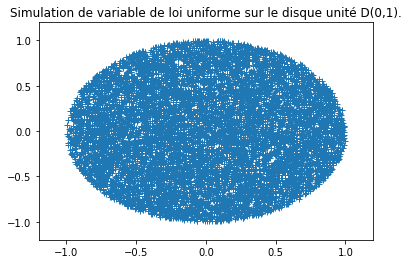

In [2]:
# Question 1a
#simuler une variable al´eatoire de loi uniforme sur le disque unité,
#en partant de variables uniformes sur le carrée [−1, 1]²

N = 10000  #nombre de simulation
nb_rejets = 0

#fonction qui renvoie U et V deux suites indépendantes de variables indépendantes
#de loi uniforme sur [−1, 1], avec T = inf{n ∈ N, U²+ V², n < 1},
#le couple (UT , VT ) suit la loi unforme sur le disque de centre 0 et de rayon 1.
def disque():
    global nb_rejets   #variable global
    while True:
        u,v = 2*random()-1, 2*random()-1
        if u**2+v**2<1:
            return u,v
        nb_rejets += 1

plt.figure(1)
simu = [disque() for i in range(N)]
print("On a rejete {0} simulations".format(nb_rejets))
print("En moyenne, on en rejette: ",(4/pi-1)*N)
plt.plot([a[0] for a in simu], [a[1] for a in simu], '+')
plt.title("Simulation de variable de loi uniforme sur le disque unité D(0,1).")
plt.axis([-1.2,1.2,-1.2,1.2])
plt.show()

On en rejete 2186 et on en accepte 7814.


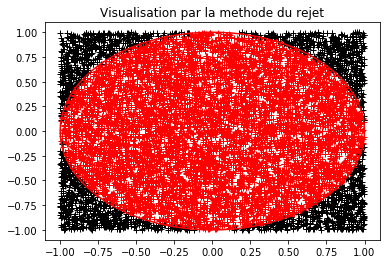

In [3]:
# Question 1b représentation de la méthode de rejet
def T_pour_rejet(N):
    accept = []
    reject = []
    for i in range(N):
        u,v = 2*random()-1, 2*random()-1  
        if u**2+v**2>1:
            reject.append((u,v))
        else:
            accept.append((u,v))
    return {'accept':accept, 'reject': reject}

T=T_pour_rejet(N)
accept=T['accept']
reject=T['reject']
        
print("On en rejete {0} et on en accepte {1}.".format(len(reject),len(accept)))
plt.plot([a[0] for a in accept], [a[1] for a in accept], '+r')
plt.plot([r[0] for r in reject], [r[1] for r in reject], '+k')
t = [2*pi*i/100. for i in range(101)]
plt.plot([cos(u) for u in t], [sin(u) for u in t], 'r')
plt.title("Visualisation par la methode du rejet")
plt.show()
    

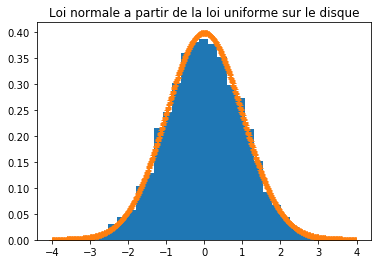

In [4]:
# Question 2
#Si (X, Y ) est un couple aléatoire de loi uniforme sur le disque unitée et si on pose R = X²+Y², 
#T =racine(−2 ln(R)/R), alors on peut montrer que les variables aléatoires T X et T Y sont indépendantes
#de loi normale centrée réduite.

#Fonction qui renvoie Loi normale Tx Ty a partir de la loi uniforme sur le disque #########
def normale_sur_d():
    x,y = disque()
    T = x**2+y**2
    T = (-2*log(T)/T) ** 0.5
    return x*T, y*T

simu = [normale_sur_d()[0] for i in range(N)]
plt.hist(simu, density=True, bins=30)
x = [i/100. for i in range(-400,400)]
plt.plot(x,[exp(-t**2/2) * (2*pi)**-0.5 for t in x], '+')   # densité 
plt.title("Loi normale a partir de la loi uniforme sur le disque")
plt.show()



# 2 Simulation de variables de densité donnée

In [5]:
#Question 1
#On souhaite simuler une variable X dont la densitée est donnée par exemple par f(x) = 1/2π(1 + sin(x))*1[0,2π] (indicatrice)

nb_rejets = 0

# fonction qui simule un couple (X, Y ) dont la loi est
#uniforme sur l’ensemble G2πf = {(x, y) ∈]0, 2π[×]0, 2[, y < 1 + sin(x)} et qui renvoie la valeur de X.
def X():
    global nb_rejets
    while True:
        x,y = 2*pi*random(), 2*random()
        if y<1+sin(x):
            return x
        nb_rejets += 1
#test 
print("Une simulation de X: ", X() )

Une simulation de X:  5.893367277264112


On a rejete 10171 simulations


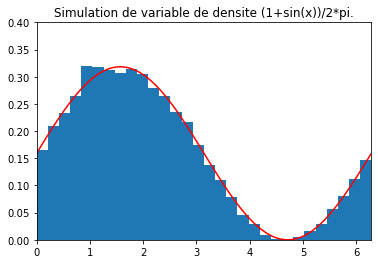

In [6]:
# Question 2 vérifier en supperpossant 
simus = [X() for i in range(N)]
print("On a rejete {0} simulations".format(nb_rejets))
plt.hist(simus, bins=30, density=True)
x = [2*pi*i/100 for i in range(101)]
plt.plot(x, [(1+sin(t))/(2*pi) for t in x], 'r')
plt.title("Simulation de variable de densite (1+sin(x))/2*pi.")
plt.axis([0, 2*pi, 0, 0.4])
plt.show()

On en rejete 5024 et on en accepte 4976.


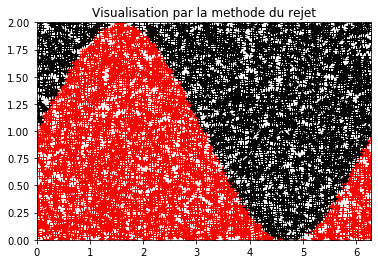

In [7]:
# Question 2b représentation de la méthode de rejet
def G2pi_pour_rejet(N):
    accept = []
    reject = []
    for i in range(N):
        x,y = 2*pi*random(), 2*random()  
        if y>1+sin(x):
            reject.append((x,y))
        else:
            accept.append((x,y))
    return {'accept':accept, 'reject': reject}

G=G2pi_pour_rejet(N)
accept=G['accept']
reject=G['reject']

print("On en rejete {0} et on en accepte {1}.".format(len(reject),len(accept)))
plt.plot([a[0] for a in accept], [a[1] for a in accept], '+r')
plt.plot([r[0] for r in reject], [r[1] for r in reject], '+k')
t = [2*pi*i/100. for i in range(101)]
plt.plot([cos(u) for u in t], [sin(u) for u in t], 'r')
plt.title("Visualisation par la methode du rejet")
plt.axis([0,2*pi,0,2])
plt.show()
    

# 2.2 Cas général

On a rejete 3080 simulations
En moyenne, on en rejette:  3154.8924695891387


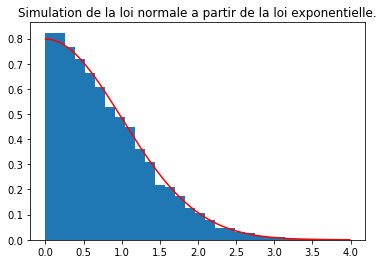

In [8]:

###### Loi normale par methode du rejet a partir de lois exponentielles #######

C = exp(0.5) # On doit prendre C>=exp(0.5)

nb_rejets = 0

#fonction qui simule une variable de loi uniforme sur l’ensemble G1 = {(x, y) ∈]0,∞[², y < C*e^−x}, en 
#utilisant une variable de loi exponentielle de paramètre 1

def normale_sur_exp():
    global nb_rejets
    while True:
        x = -log(random())
        y = C*exp(-x)*random()
        if y<exp(-x**2/2):
            return x
        nb_rejets += 1
simu = [normale_sur_exp() for i in range(N)]
print("On a rejete {0} simulations".format(nb_rejets))
print("En moyenne, on en rejette: ",(C*(2/pi)**0.5-1)*N)
plt.hist(simu, density=True, bins=30)
x = [i/100. for i in range(400)]
plt.plot(x, [exp(-t**2/2) * (2/pi)**0.5 for t in x], 'r')
plt.title("Simulation de la loi normale a partir de la loi exponentielle.")
plt.show()


On en rejete 2403 et on en accepte 7597.


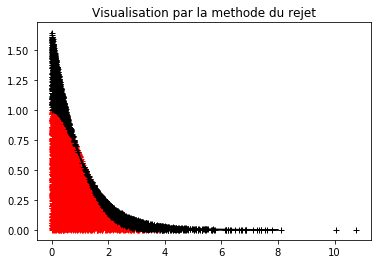

In [9]:
# Question 2 
#fct qui simule par méthode du rejet une variable de loi uniforme sur l’ensemble G2 = {(x, y) ∈]0,∞[², y ≤ e−x²/2} 
def G2_pour_rejet(N):
    accept = []
    reject = []
    for i in range(N):
        x = -log(random())
        y = C*exp(-x)*random()
        if y>exp(-x**2/2):
            reject.append((x,y))
        else:
            accept.append((x,y))
    return {'accept':accept, 'reject': reject}

G=G2_pour_rejet(N)
accept=G['accept']
reject=G['reject']
print("On en rejete {0} et on en accepte {1}.".format(len(reject),len(accept)))
plt.plot([a[0] for a in accept], [a[1] for a in accept], '+r')
plt.plot([r[0] for r in reject], [r[1] for r in reject], '+k')
x = [i/100. for i in range(800)]
plt.plot(x, [C*exp(-t) for t in x], 'k')
plt.plot(x, [exp(-t**2/2) for t in x], 'k')
plt.title("Visualisation par la methode du rejet")
plt.show()